<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn Prediction

*por* `Rubens Gianfaldoni`

---

<img alt="covid19" width="100%" src="https://blog.plugcrm.net/wp-content/uploads/2016/10/churn-dicas-evitar-cancelamento-clientes-plugcrm.png">

*Churn* é que uma métrica usada para calcular o índice de saída de clientes de um serviço x índice de entrada do cliente.

Existem vários impactos diretos de um alto *Churn Rate* no negócio, mas o impacto financeiro e a imagem negativa são os maiores pontos a serem destacados.

Algumas empresas/startups americanas costumam dizer que 7% é um índice aceitável. As empresas que conseguem manter esse número abaixo são verdadeiras máquinas de venda.

Infelizmente, algumas empresas não conseguem reduzir o *Churn Rate* porque não conseguem reconhecê-lo.

Com essa análise iremos abordar vários modelos, que ajudarão em como começar esse reconhecimento de perda de clientes, baseados nas informações obtidas anteriormente.

O conjunto de dados foi obtido [aqui](https://bit.ly/3ibwGq7).

Vamos entender as variáveis do `dataset`.

*   `customerID` - identificação do cliente
*   `gender` - gênero sexual
*   `SeniorCitizen` - se o cliente é idoso
*   `Partner` - 
*   `Dependents` - se tem dependentes
*   `tenure` - 
*   `PhoneService` - Se possui serviço de telefone
*   `MultipleLines` - se tem mais de 1 linha telefônica
*   `InternetService` - se o serviço de internet é DSL, fibra ótica ou não possui
*   `OnlineSecurity` - se possui serviço de segurança, antivírus, firewall ou não possui internet
*   `OnlineBackup` - se possui serviço de backup, ou não tem internet
*   `DeviceProtection` - se possui serviço de proteção no seu dispositivo
*   `TechSupport` - se possui serviço de suporte técnico
*   `StreamingTV` - se possui serviço de Streaming de canais
*   `StreamingMovies` - se possui serviço de Streaming de filmes, seriados, etc...
*   `Contract` - se o contrato é mensal, de 1 ano ou 2 anos.
*   `PaperlessBilling` - se prefere sua conta de pagamento online ou não.
*   `PaymentMethod` - método de pagamento
*   `MonthlyCharges` - valor mensal
*   `TotalCharges` - valor total
*   `Churn` - clientes que cancelaram os serviços com a empresa, no último mês.



In [793]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#evitar warnings na análise
import warnings
warnings.filterwarnings("ignore")

#bibliotecas para machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [794]:
#criar uma variável para o dataset
DATA_PATH = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn = pd.read_csv(DATA_PATH)

In [795]:
#visualizar primeiras 7 linhas
churn.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [796]:
#exibir últimas 7 linhas
churn.tail(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [797]:
#exibir tamanho do dataset
print('Linhas: {}'.format(churn.shape[0]))
print('Colunas: {}'.format(churn.shape[1]))

Linhas: 7043
Colunas: 21


In [798]:
#valores únicos por coluna
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Podemos verificar que neste momento para detectar a razão de um cliente deixar de consumir um produto, é irrelevante a coluna `customerID`, portanto iremos removê-la pois no futuro teremos que transformar todas as colunas em variáveis númericas binárias.

In [799]:
#eliminando colunas customerID
churn.drop('customerID', axis=1, inplace=True)

In [800]:
#exibindo novo dataset, sem customerID
churn.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [801]:
#exibir valores nulos/ausentes em %
(churn.isnull().sum() / churn.shape[0]).sort_values(ascending=False)

Churn               0.0
TotalCharges        0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
gender              0.0
dtype: float64

In [802]:
#exibir mais detalhes do dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [803]:
#resumo estatístico do dataset
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Após exibir o comando `churn.info` e `churn.describe`, nota-se que no resumo estatístico não foi exibido a coluna `TotalCharges` que é um valor numérico. Isso aconteceu pois essa variável foi classificada como *String(object)* no `dataset`. Vamos reparar isso convertendo a variável categórica para uma variável numérica.

In [804]:
#valores diferentes de ' '(espaço em branco)
len(churn[churn['TotalCharges'] != ' '])

7032

In [805]:
#valores iguais à um espaço em branco
len(churn[churn['TotalCharges'] == ' '])

11

Usamos uma lógica para verificar se existem linhas diferentes de números. Com isso buscamos todo conteúdo que seja diferente de um espaço em branco. O total foi de `7032`.

Após, fizemos a leitura de toda linha que fosse igual à um espaço em branco. O total foi de `11`.

Como o `dataset` tem `7043` linhas, ficou claro que para convertermos essa variável `TotalCharges` vamos precisar converter as linhas com espaço em branco para valores ausentes/nulos e depois aplicar em seguida a mediana da coluna para esses `11` valores.

In [806]:
#transformando valores de espaço em branco em NaN
churn.loc[churn['TotalCharges'] == ' ', 'TotalCharges'] = np.nan

In [807]:
len(churn[churn['TotalCharges'] != ' '])

7043

In [808]:
#exibindo valores ausentes do dataset após transformação
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Agora com valores substituídos não vamos encontrar dificuldades para converter para um valor numérico do tipo `float`. 

In [809]:
#preenchendo os 11 valores ausentes com a mediana da variável TotalCharges
tc_mediana = churn['TotalCharges'].median()
churn['TotalCharges'].fillna(tc_mediana, inplace=True)

In [810]:
#convertendo a variável TotalCharges para tipo FLOAT
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

In [811]:
#novo resumo estatístico após conversão da variável
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Análise dos dados

Neste `dataset` vamos avaliar a possibilidade de um cliente deixar de usar o produto da empresa. 

Por esse motivo usaremos a coluna `Churn` como variável alvo para os modelos.

Trata-se de uma variável categórica, dividida em 2 possibilidades: *Yes ou No*. 

In [812]:
#exibir valores da coluna Churn e porcentagem 
print(churn['Churn'].value_counts())
print('\nTotal de Churn é {:.2%}'.format(churn[churn['Churn'] == 'Yes'].shape[0] / churn.shape[0]))

No     5174
Yes    1869
Name: Churn, dtype: int64

Total de Churn é 26.54%


Para obter um modelo mais assertivo, precisamos balancear o `dataset`. Na variável `Churn`, já podemos perceber que não está, visto que *No* tem muito mais resultados que *Yes*.

Mas antes, vamos verificar nas variáveis categóricas se existem respostas além de `Yes` ou `No`.

In [813]:
#criando uma função que faz a leitura dos conteúdo das variáveis categóricas
def respostas():
  colunas = np.unique(churn.select_dtypes('object').columns)
  for r in colunas:
    print(r, churn[r].unique())

respostas()

Churn ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No' 'Yes' 'No internet service']
InternetService ['DSL' 'Fiber optic' 'No']
MultipleLines ['No phone service' 'No' 'Yes']
OnlineBackup ['Yes' 'No' 'No internet service']
OnlineSecurity ['No' 'Yes' 'No internet service']
PaperlessBilling ['Yes' 'No']
Partner ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService ['No' 'Yes']
StreamingMovies ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
gender ['Female' 'Male']


As variáveis `DeviceProtection`, `OnlineBackup`, `OnlineSecurity`, `StreamingMovies`, `StreamingTV`, `TechSupport` possuem 3 categorias. Vamos assumir que a resposta `No internet service` será `No`.

In [814]:
#convertendo respostas No internet service para No
y_n = ['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']

for r in y_n:
  churn.loc[churn[r].isin(['No internet service']), r] = 'No'

In [815]:
#nova lista de variáveis categóricas
respostas()

Churn ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
MultipleLines ['No phone service' 'No' 'Yes']
OnlineBackup ['Yes' 'No']
OnlineSecurity ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Partner ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService ['No' 'Yes']
StreamingMovies ['No' 'Yes']
StreamingTV ['No' 'Yes']
TechSupport ['No' 'Yes']
gender ['Female' 'Male']


In [816]:
#converter variável categórica em numérica
churn.loc[churn.Churn == 'No', 'Churn'] = 0
churn.loc[churn.Churn == 'Yes', 'Churn'] = 1
churn['Churn'] = churn['Churn'].astype(int)

In [817]:
#após conversão da variável Churn
churn['Churn'] 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Vamos comparar algumas variáveis com a variável `Churn` para tentar demonstrar algumas relações entre elas.

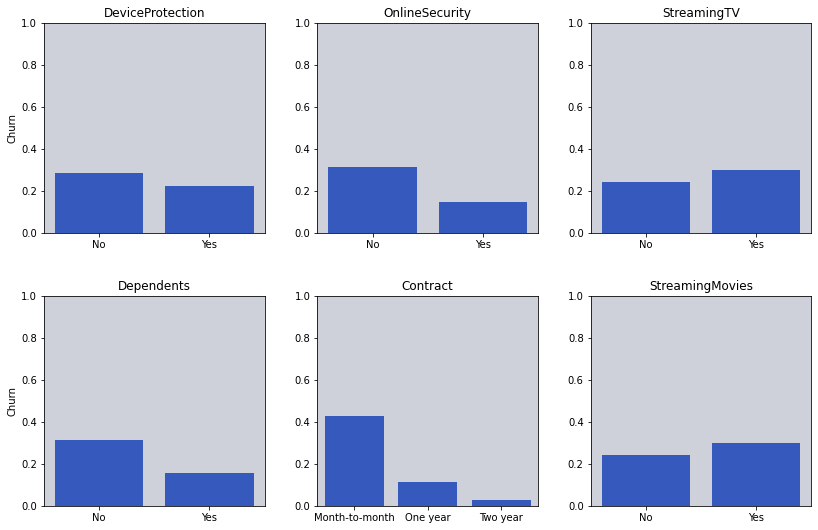

In [818]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.barplot(churn['DeviceProtection'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[0][0])
ax[0][0].set_facecolor('#ced1d9')
ax[0][0].set_ylim(0,1)
ax[0][0].set_xlabel(None)
ax[0][0].set_title('DeviceProtection')

sns.barplot(churn['OnlineSecurity'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[0][1])
ax[0][1].set_facecolor('#ced1d9')
ax[0][1].set_ylim(0,1)
ax[0][1].set_xlabel(None)
ax[0][1].set_ylabel(None)
ax[0][1].set_title('OnlineSecurity')

sns.barplot(churn['StreamingTV'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[0][2])
ax[0][2].set_facecolor('#ced1d9')
ax[0][2].set_ylim(0,1)
ax[0][2].set_xlabel(None)
ax[0][2].set_ylabel(None)
ax[0][2].set_title('StreamingTV')

sns.barplot(churn['Dependents'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[1][0])
ax[1][0].set_facecolor('#ced1d9')
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlabel(None)
ax[1][0].set_title('Dependents')

sns.barplot(churn['Contract'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[1][1])
ax[1][1].set_facecolor('#ced1d9')
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlabel(None)
ax[1][1].set_ylabel(None)
ax[1][1].set_title('Contract')

sns.barplot(churn['StreamingMovies'], churn['Churn'], color='#1e4ed4', ci=None, ax=ax[1][2])
ax[1][2].set_facecolor('#ced1d9')
ax[1][2].set_ylim(0,1)
ax[1][2].set_xlabel(None)
ax[1][2].set_ylabel(None)
ax[1][2].set_title('StreamingMovies')

plt.tight_layout(pad=3.0)

Pelos gráficos de barra, podemos tirar algumas conclusões:


*   Clientes que não tem proteção de dispositivos e segurança online são propensos a cancelar o serviço da empresa, assim como clientes que não tem dependentes.
*   Clientes com serviços de filmes e TV são propensos a cancelar o serviço com a empresa.
* Clientes que pagam mensalmente o plano, acabam cancelando seus planos. Essa é uma informação muito importante que pode ser explorada pela empresa.



#Contruindo um modelo de Machine Learning

Para criar um modelo de Machine Learning é necessário transformar as variáveis categóricas em numéricas. Usaremos uma função do *pandas* chamada `get_dummies` para fazer a conversão, chamando toda variável `object` e convertendo para binária. Caso a variável tenha mais de 2 opções de resposta, essa resposta vai virar uma coluna derivada da original.

In [819]:
#toda variável que tiver 2 tipos de resposta e for diferente da variável Churn
variavel_binaria = [col for col in churn.columns 
           if len(churn[col].unique()) == 2 and col != 'Churn']

#toda variável categórica
variavel_cat = [col for col in churn.select_dtypes(['object']).columns.tolist() 
           if col not in bin_var]

#transformando as variáveis binárias 
le = LabelEncoder()
for col in bin_var:
  churn[col] = le.fit_transform(churn[col])

#usando a função get_dummies
churn = pd.get_dummies(churn, columns=cat_var)

churn.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,0,1,0,0,1,0,1,89.10,1949.40,0,0,0,1,0,1,0,1,0,0,0,1,0,0


Agora o `dataset` contém além das variáveis anteriores, novas variáveis onde cada resposta que a coluna tinha, foi transformada em uma nova coluna com sua respectiva resposta. Por exemplo:


*   Antes a coluna `InternetService` tinha 3 respostas `DSL`, `Fiber optic` e `No`, após aplicar `get_dummies` agora existem 3 colunas distintas `InternetService_DSL`, `InternetService_Fiber optic` e `InternetService_No`.




#Modelo de Machine Learning

Para que um modelo seja criado, é necessário normalizá-lo e balaceá-lo, usaremos 2 bibliotecas: 


1.   **StandardScaler** para normalizar
2.   **RandomUnderSampler** para balancear 



In [820]:
#dividindo dataset treino e teste
X = churn.drop('Churn', axis=1)
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

#padronizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#balanceando o dataset
rus = RandomUnderSampler()
X_train_rus, y_train_rus, = rus.fit_sample(X_train, y_train)

In [821]:
#instanciando hiperparâmetros
model_xgb = XGBClassifier()
model_svc = SVC()
model_lgr = LogisticRegression()

In [822]:
#fazendo previsões sobre os novos dados
model = []
recall = []
cross_v = []

for r in (model_lgr, model_svc, model_xgb):
  model.append(r.__class__.__name__)
  cross_v.append(cross_validate(r, X_train_rus, y_train_rus, scoring='recall'))

for b in range(len(cross_v)):
  recall.append(cross_v[b]['test_score'].mean())

In [823]:
#exibir o resultado para os modelos
rec = pd.DataFrame(data=recall, index=model, columns=['Recall'])
rec

,Recall
LogisticRegression,0.807473
SVC,0.788347
XGBClassifier,0.798261


Apesar dos valores estarem próximos, com alguns parâmetros, conseguimos deixar ainda melhor nosso modelo.

Vamos aplicar agora alguns parâmetros para verificar, se de fato, melhoram.

---

A biblioteca `GridSearch` vai ajudar a escolher os melhores parâmetros dentre vários que vamos testar. 

Vamos focar em parâmetros para melhorar o desempenho do modelo.

**melhor com método de classificação**

resultado com LogisticRegression()

Iremos aplicar alguns parâmetros para otimizar nosso modelo como:


*   liblinear : `bom para datasets pequenos`
*   newton-cg : `problemas com muitas classes`
*   lbfgs     : `parâmetro default de otimização`

Para mais informações, consulte a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).



In [824]:
#parametros para treinar modelo LogisticRegression()
log_param = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(model_lgr, log_param, scoring='recall')
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 86.55%


{'C': 0.0001, 'solver': 'liblinear'}

`Conseguimos melhorar o modelo de classificação de 81% para 86.64%.`

---

**método XGBOOST**

resultado com XGBClassifier()

Nessa tentativa, iremos treinar o modelo com `n_estimators`, `gamma`, `max_depth`, `subsample`, `learning_rate` que precisam de 3 valores para testar: *start*, *stop* e *step*.

A biblioteca GridSearch vai ajudar a escolher os melhores parâmetros.

Para mais informações, consulte a [documentação oficial](https://xgboost.readthedocs.io/en/latest/index.html).

In [825]:
#parametros para treinar modelo XGBoost
xgb_param = {'n_estimators': range(0, 500, 15)}

grid_search = GridSearchCV(model_xgb, xgb_param, scoring='recall')
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 81.17%


{'n_estimators': 15}

In [826]:
#detalhamento de todos os treinos para verificar que o n_estimators 15 é a melhor escolha
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

0.000000 (0.000000) with: {'n_estimators': 0}
0.811711 (0.031857) with: {'n_estimators': 15}
0.807463 (0.032051) with: {'n_estimators': 30}
0.805343 (0.027422) with: {'n_estimators': 45}
0.798973 (0.029333) with: {'n_estimators': 60}
0.794720 (0.031491) with: {'n_estimators': 75}
0.799672 (0.031061) with: {'n_estimators': 90}
0.798258 (0.030181) with: {'n_estimators': 105}
0.794015 (0.027772) with: {'n_estimators': 120}
0.793309 (0.028676) with: {'n_estimators': 135}
0.792607 (0.029334) with: {'n_estimators': 150}
0.793319 (0.029903) with: {'n_estimators': 165}
0.789071 (0.026714) with: {'n_estimators': 180}
0.788369 (0.022121) with: {'n_estimators': 195}
0.788372 (0.022325) with: {'n_estimators': 210}
0.784841 (0.016865) with: {'n_estimators': 225}
0.785545 (0.018900) with: {'n_estimators': 240}
0.786958 (0.019675) with: {'n_estimators': 255}
0.786956 (0.022214) with: {'n_estimators': 270}
0.782713 (0.020681) with: {'n_estimators': 285}
0.781300 (0.019770) with: {'n_estimators': 300}


`Conseguimos melhorar o modelo XGBoost de 79% para 81%. Porém ainda podemos melhorar com mais parâmetros.`

O GridSearch vai nos mostrar qual melhor valor para `gamma`

In [835]:
model_xgb = XGBClassifier(n_estimators=15)

#procurando melhor valor para gamma
xgb_param = {'gamma': np.arange(0, 20, 1)}

grid_search = GridSearchCV(model_xgb, xgb_param, scoring='recall', n_jobs=-1)
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 81.74%


{'gamma': 6}

`o modelo decidiu que gamma = 6 é o melhor valor`

O GridSearch vai nos mostrar qual melhor valor para `max_depth`.

In [836]:
model_xgb = XGBClassifier(n_estimators=15, 
                          gamma=6)

#procurando melhor valor para max_depth
xgb_param = {'max_depth': range(0, 4, 1)}

grid_search = GridSearchCV(model_xgb, xgb_param, scoring='recall', n_jobs=-1)
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 85.07%


{'max_depth': 1}

`o modelo decidiu que max_depth = 1 é o melhor valor`

O GridSearch vai nos mostrar qual melhor valor para `subsample`.

In [837]:
model_xgb = XGBClassifier(n_estimators=15, 
                          gamma=5, 
                          max_depth=1)

#procurando melhor valor para subsample
xgb_param = {'subsample': np.arange(0.8, 1.0, 0.1)}

grid_search = GridSearchCV(model_xgb, xgb_param, scoring='recall', n_jobs=-1)
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 85.77%


{'subsample': 0.9}

`o modelo decidiu que subsample = 0.9 é o melhor valor`

In [838]:
model_xgb = XGBClassifier(n_estimators=15, 
                          gamma=6, 
                          max_depth=1, 
                          subsample=0.9)

#procurando melhor valor para learning_rate
xgb_param = {'learning_rate': [0.001 ,00.1, 0.1, 1]}

grid_search = GridSearchCV(model_xgb, xgb_param, scoring='recall', n_jobs=-1)
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 88.46%


{'learning_rate': 0.001}

`o modelo decidiu que learning_rate = 0.001 é o melhor valor`

Tivemos pequenos ganhos em cada parâmetro que entrava no modelo XGBoost.

No final, conseguimos melhorar o XGBCLassifier() de `79%` para `88%`.

---

**método Support Vector Classification SVC**

Nesse treino, iremos usar um parâmetro `kernel` para tentar otimizar.

Mais informações no [documento oficial](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [831]:
svc_param = {'kernel': ['linear', 'poly', 'sigmoid', 'precomputed'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model_xgb, svc_param, scoring='recall', n_jobs=-1)
result = grid_search.fit(X_train_rus, y_train_rus)

print('Melhor resultado -> {:.2%}'.format(result.best_score_))
result.best_params_

Melhor resultado -> 82.09%


{'C': 0.001, 'kernel': 'linear'}

`Conseguimos melhorar o modelo SVC de 78% para 82%.`

---

Após melhorarmos os modelos, é o momento de aplicar esses resultados no conjunto de testes.

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1305
           1       0.46      0.88      0.61       456

    accuracy                           0.71      1761
   macro avg       0.70      0.76      0.69      1761
weighted avg       0.82      0.71      0.72      1761



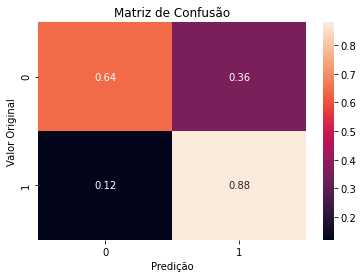

In [832]:
#modelo de classificação
model_lgr = LogisticRegression(solver='liblinear', C=0.0001)
model_lgr.fit(X_train_rus, y_train_rus)

#preditivo
log_X_test = scaler.transform(X_test)
log_y_pred = model_lgr.predict(log_X_test)

#relatório
print(classification_report(y_test, log_y_pred))

#matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, 
                             log_y_pred, 
                             normalize='true'), 
                             annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Valor Original')
ax.set_xlabel('Predição')

plt.show()

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1305
           1       0.43      0.89      0.58       456

    accuracy                           0.66      1761
   macro avg       0.68      0.74      0.65      1761
weighted avg       0.80      0.66      0.68      1761



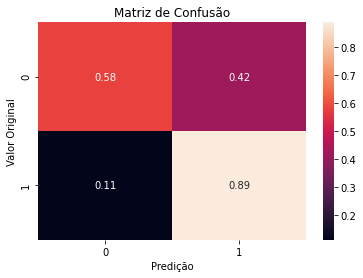

In [839]:
#modelo de XGBoost
model_xgb = XGBClassifier(n_estimators=15,
                          gamma=6, 
                          max_depth=1,
                          subsample=0.9,
                          learning_rate=0.001)
model_xgb.fit(X_train_rus, y_train_rus)

#preditivo
xgb_X_test = scaler.transform(X_test)
xgb_y_pred = model_xgb.predict(xgb_X_test)

#relatório
print(classification_report(y_test, xgb_y_pred))

#matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, 
                             xgb_y_pred, 
                             normalize='true'), 
                             annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Valor Original')
ax.set_xlabel('Predição')

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1305
           1       0.47      0.85      0.60       456

    accuracy                           0.71      1761
   macro avg       0.70      0.76      0.69      1761
weighted avg       0.81      0.71      0.73      1761



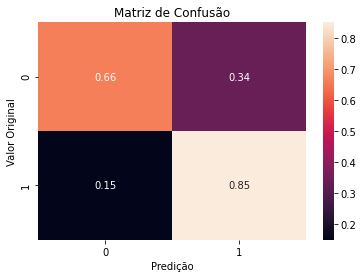

In [834]:
#modelo de SVC
model_svc = SVC(kernel='linear', C=0.001)
model_svc.fit(X_train_rus, y_train_rus)

#preditivo
svc_X_test = scaler.transform(X_test)
svc_y_pred = model_svc.predict(xgb_X_test)

#relatório
print(classification_report(y_test, svc_y_pred))

#matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, 
                             svc_y_pred, 
                             normalize='true'), 
                             annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Valor Original')
ax.set_xlabel('Predição')

plt.show()

---

#Conclusão

Churn é uma forma de descobrir quantos clientes cancelaram o serviço com uma empresa.

Neste dataset, várias variáveis conseguem demonstrar quais os perfis de clientes são mais propensos a cancelar.

Com o resultado dessa análise, muitas empresas podem descobrir formas de manter seus clientes, baseados nos perfis analisados, enviando promoções ou ofertas.

A biblioteca `XGBoost` mostrou como é uma ferramenta poderosa para otimizar um modelo de Machine Learning, juntamente com GridSearch ajudando a escolher quais são os melhores parâmetros para melhorar o modelo.

Nessa análise conseguimos o seguinte resultado usando `SVC`, `XGBoost` e `Regressão Logística`:

* **SVC**: antes -> `78%` | depois -> `85%` (RECALL)

* **XGBoost**: antes -> `80%` | depois -> `89%` (RECALL)

* **Regressão Logística**: antes -> `80%` | depois -> `88%` (RECALL)
